### Summarize outcomes of NODEBNGM

In [1]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns
import re
import math
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle

from plot_functions import *

In [2]:
# load folder directory of batch
datasets = [
    # 'miaSim',
    # '3DLV',
    # 'VanderPol',
    # 'VanderPol_noise_0-1',
    # 'VanderPol_noise_0-2',
    # 'VanderPol_noise_0-5',
    # 'VanderPol_noise_1',
    'donorA',
    'donorB',
    'male',
    'female', 
    'Silverman_all',
    # 'Silverman_daily_ALR',
    'Silverman_hourly',
    'Bucci'
    # 'BioTIME_study_339_Genus_10',
    # 'BioTIME_study_339_Species_15',
    # 'BioTIME_study_363_Genus_10',
    # 'BioTIME_study_363_Species_15',
    # 'BioTIME_study_39_Genus_10', 
    # 'BioTIME_study_39_Species_15',
    # 'BioTIME_study_478_Genus_10',
    # 'BioTIME_study_478_Species_15',
    # 'Ushio'
    ]

output_dir_raw = f"C:/Users/Maria/Documents/Masterstudium/Masterarbeit/clv_output/"

# create color map and load color palette for plots
cmap_green = LinearSegmentedColormap.from_list("white_to_green", ["white", "darkgreen"])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Summarize heatmaps of all interaction matrices

donorA


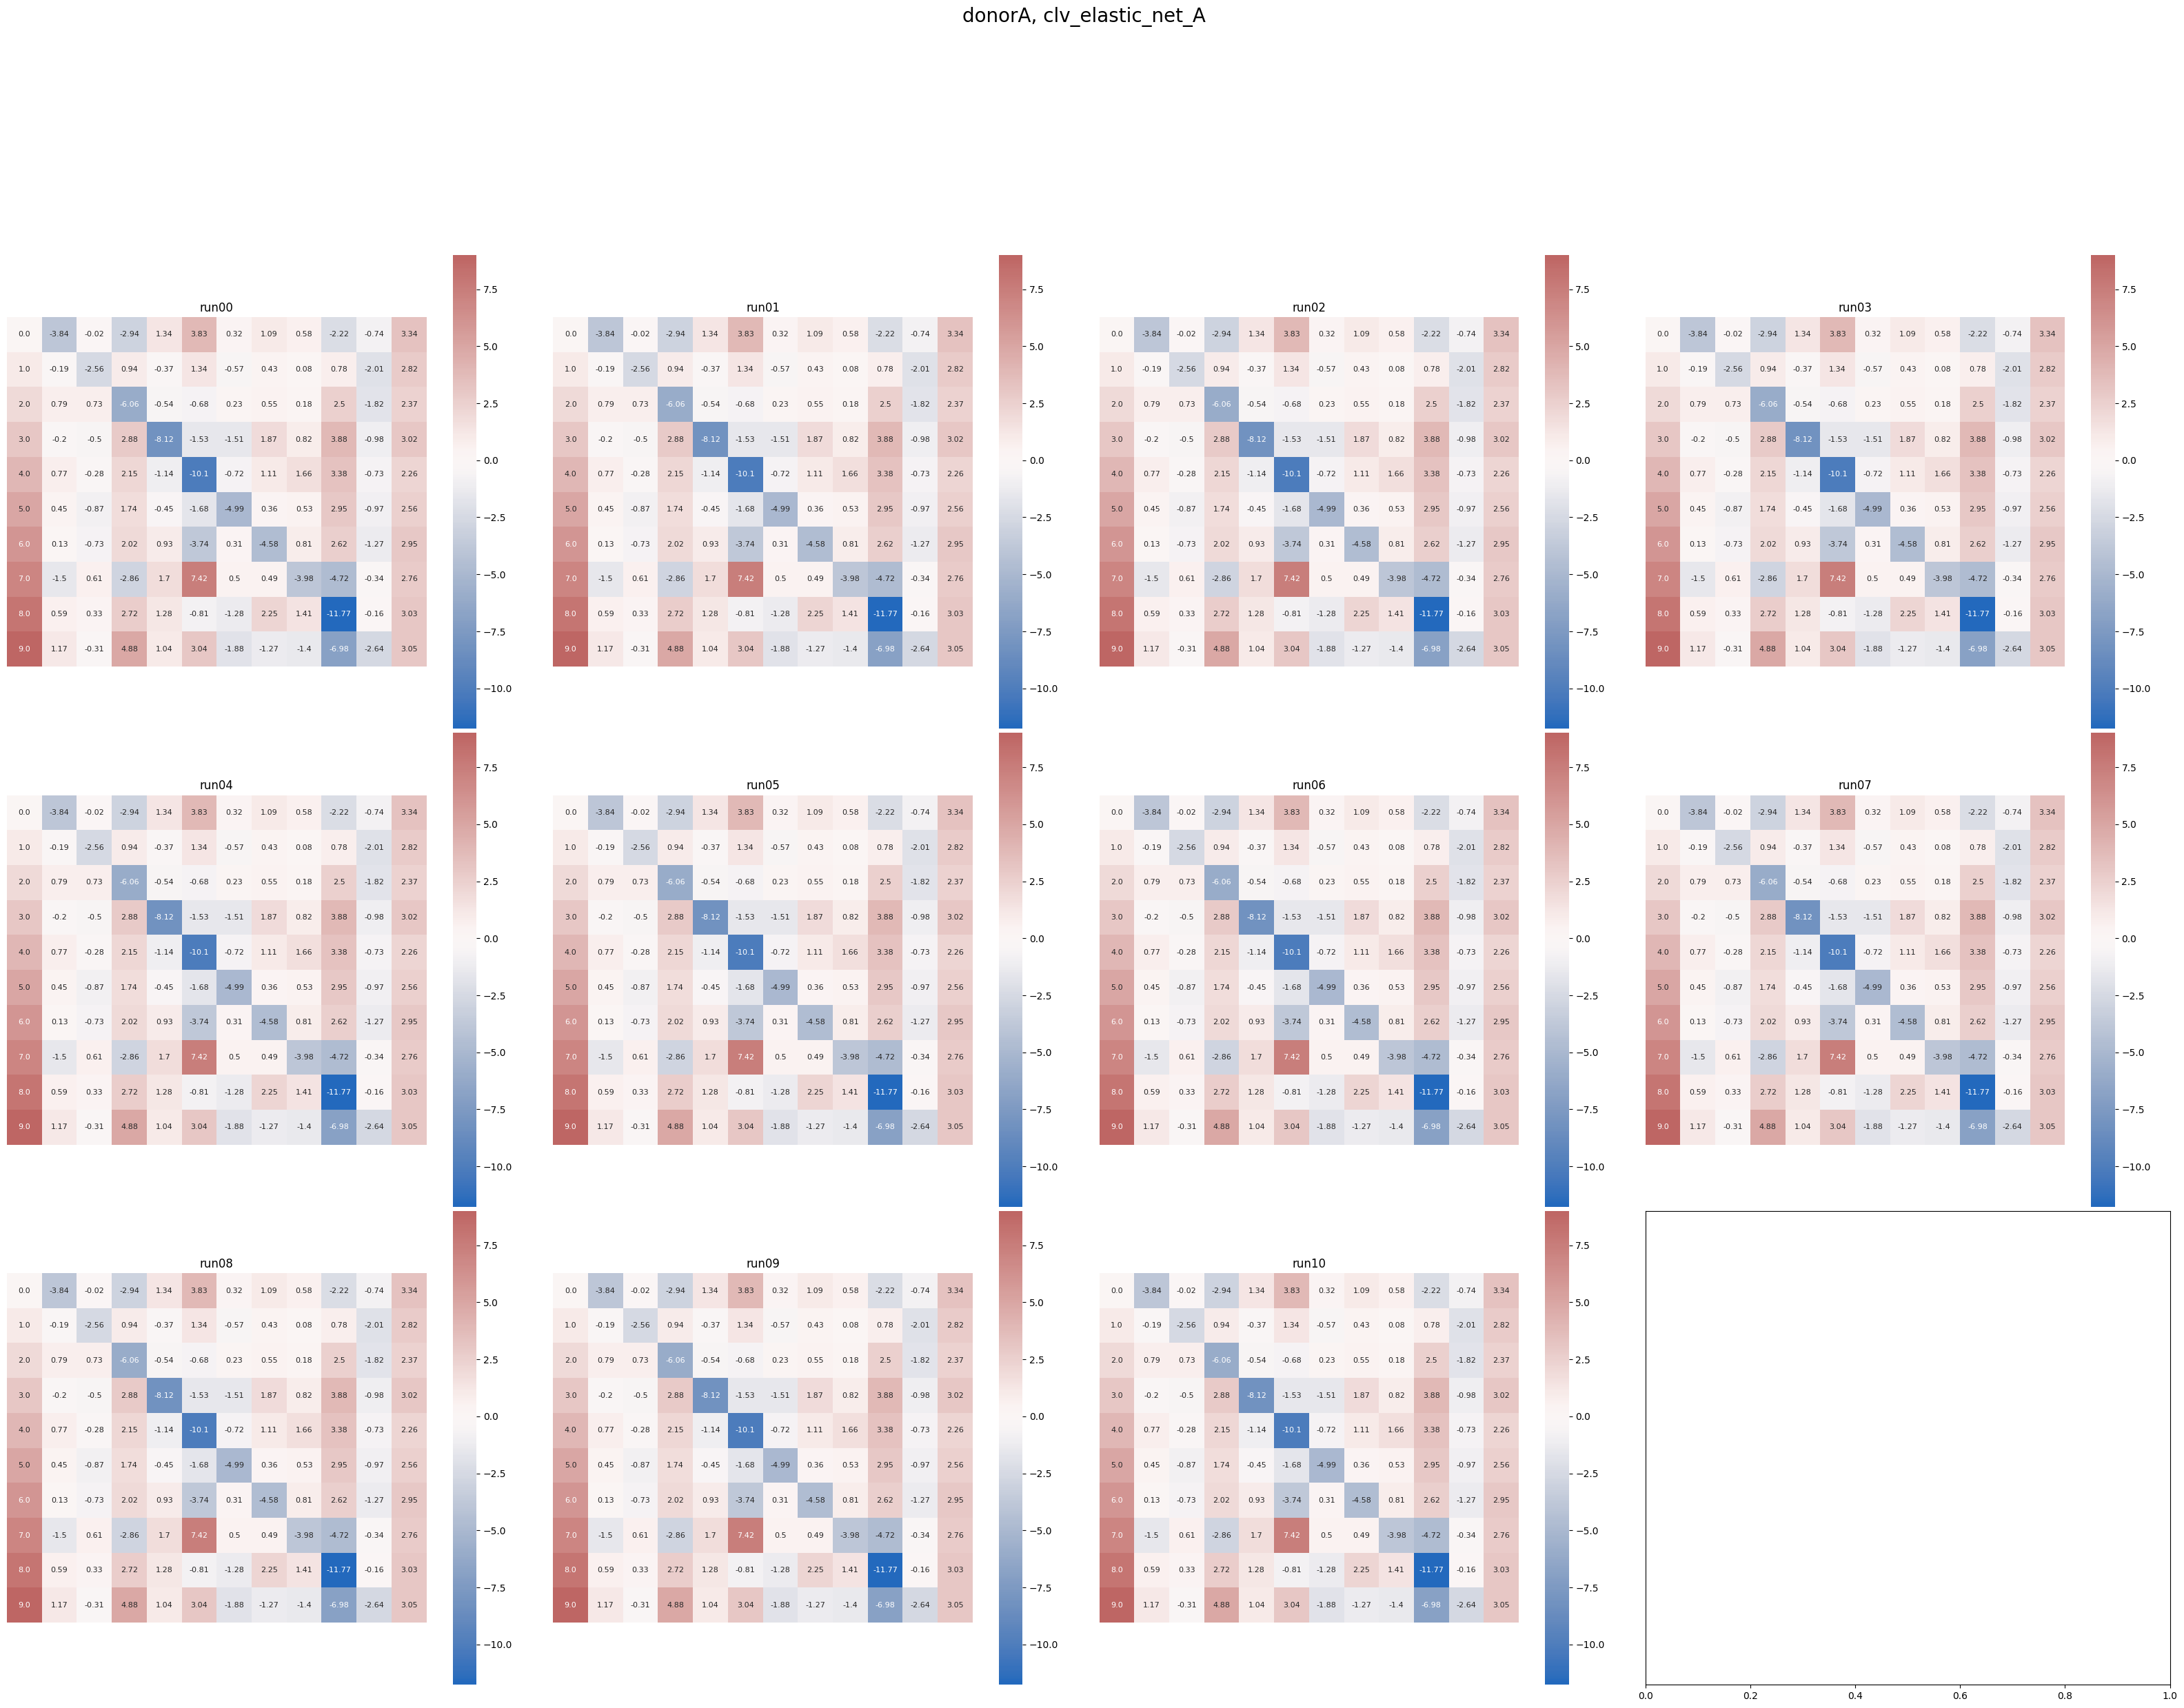

donorA


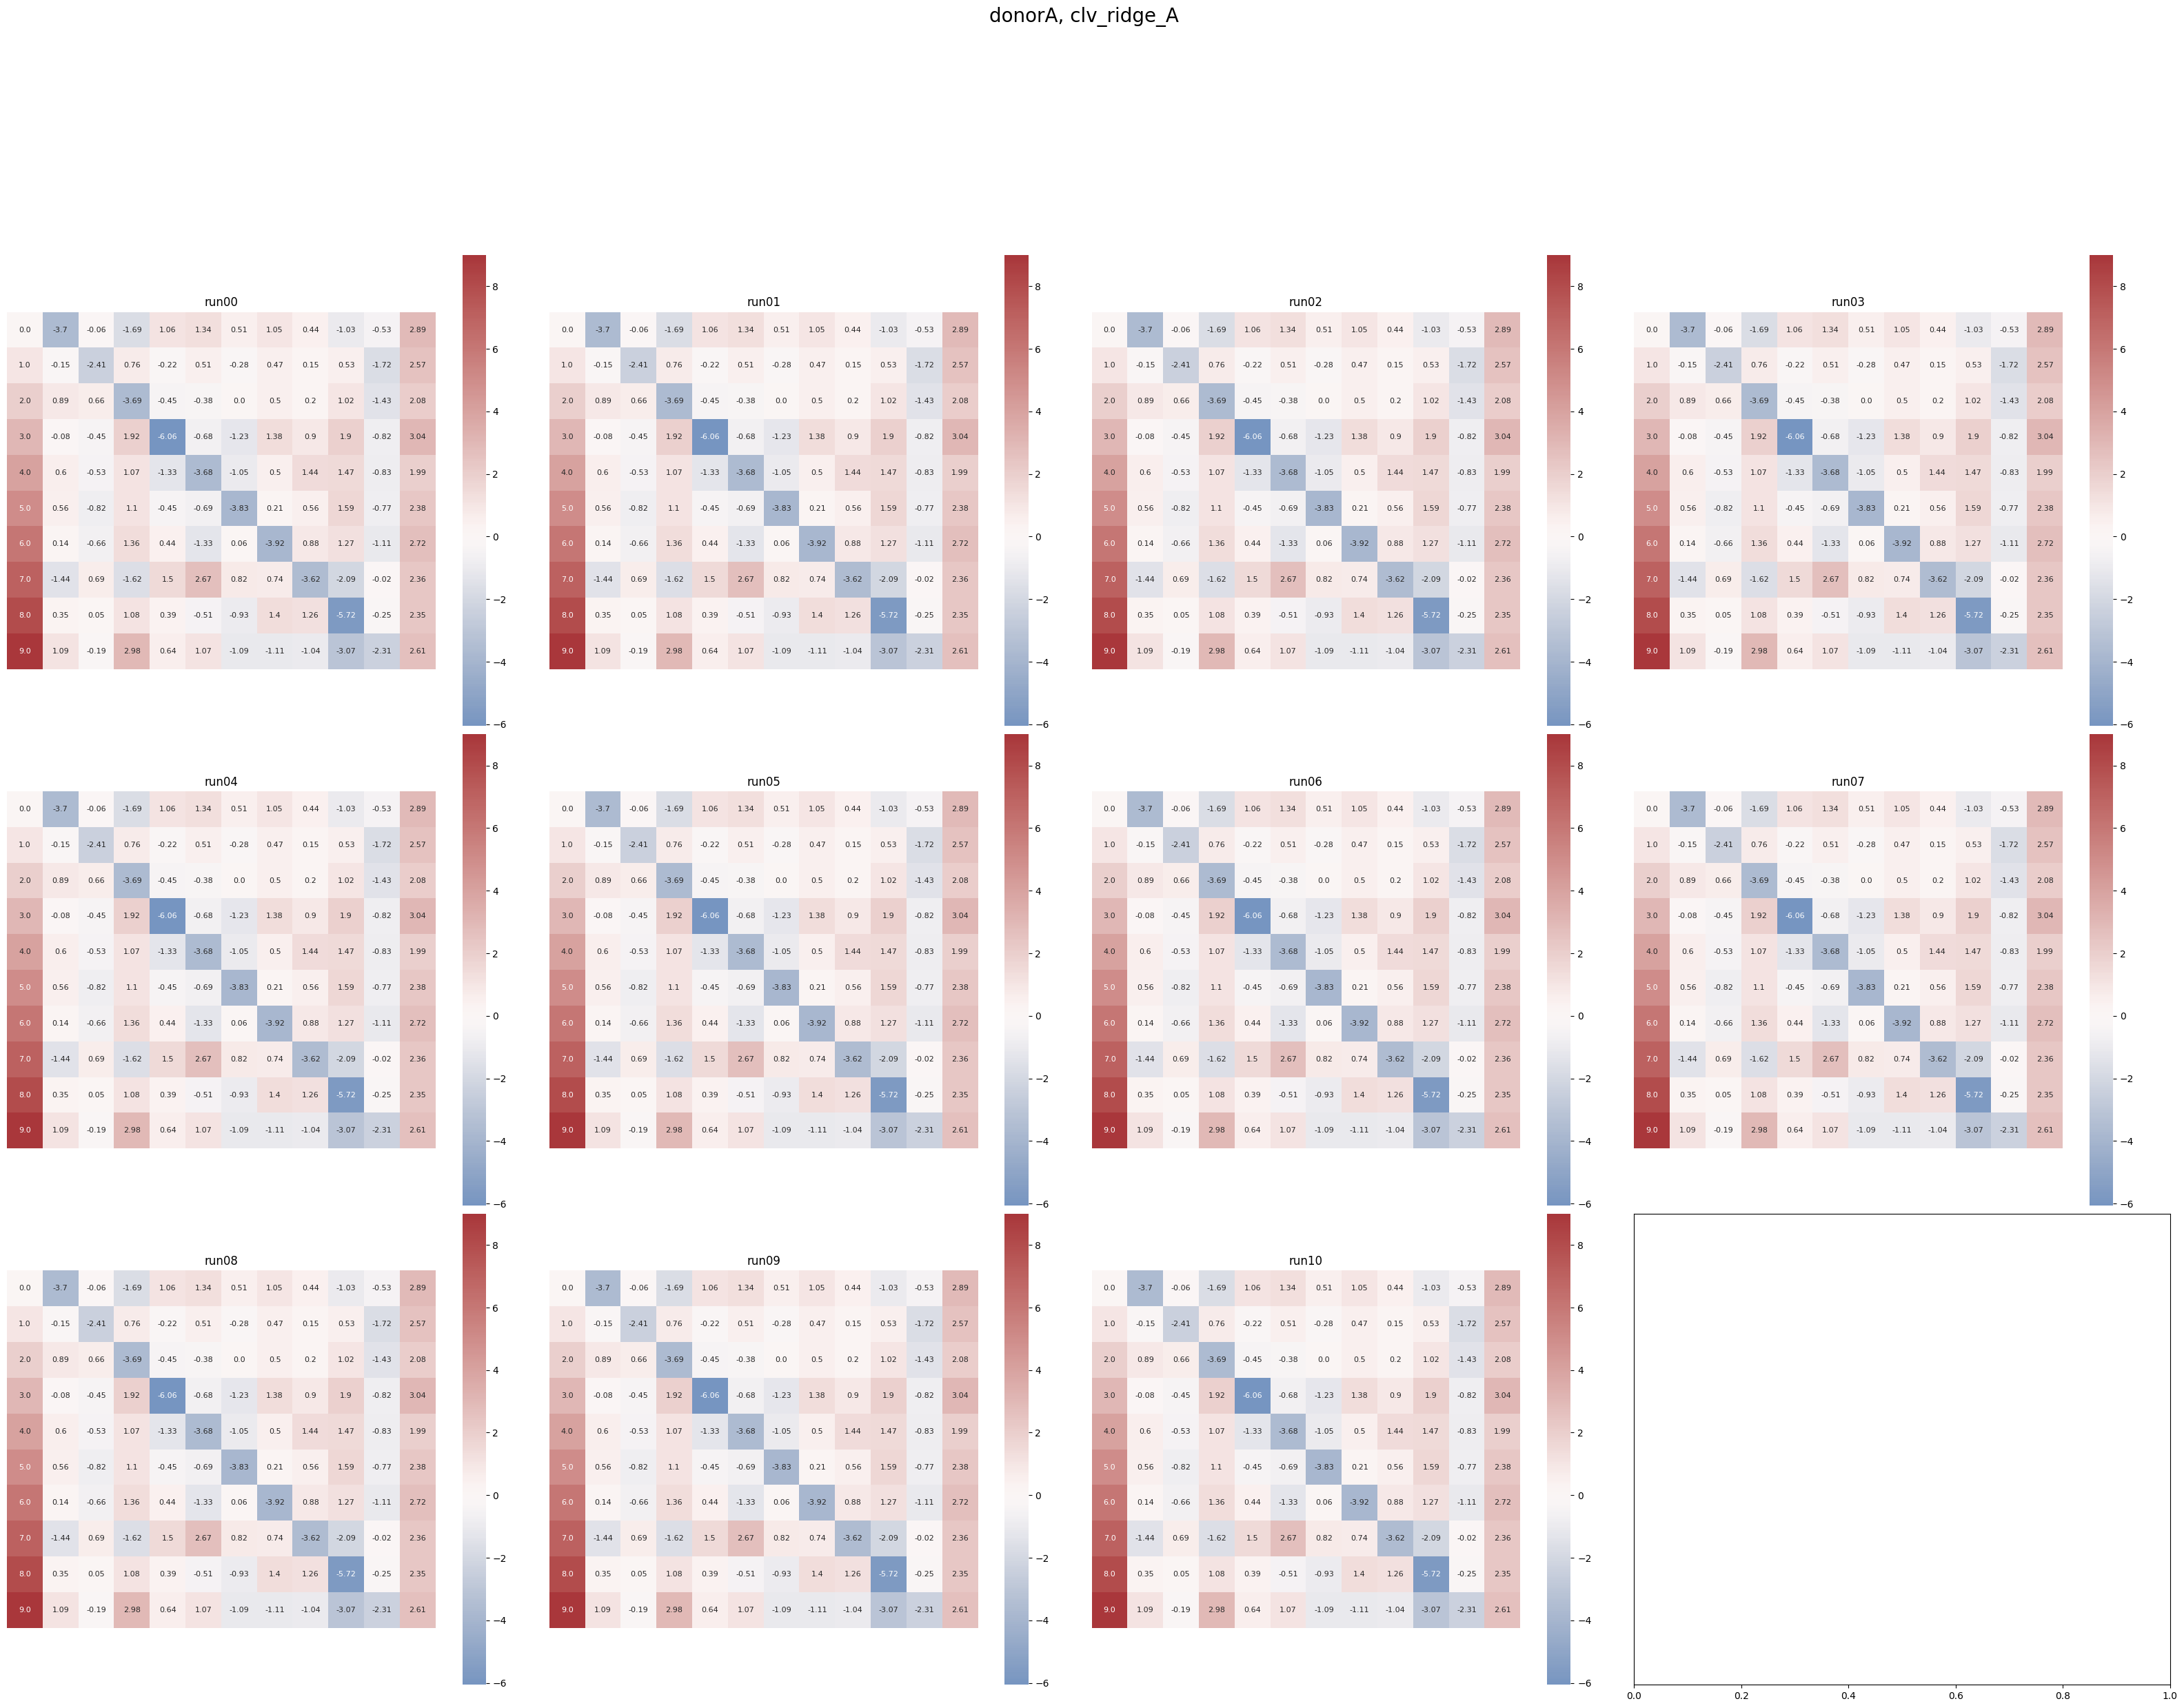

In [6]:
# for dataset in datasets:
dataset = datasets[0]  

# get number of taxa
df = pd.read_csv(f'{out_dir}/output_{dataset}_run_05/clv_elastic_net_A.csv', index_col=0)
n_taxa = len(df.index)

for Mat in ["clv_elastic_net_A", "clv_ridge_A"]:
    print(dataset)
    # dataset = datasets[1]
    out_dir = output_dir_raw + "output_" + dataset + "/"
    


    # get list of available runs for the given dataset
    runs = []
    for file in [s for s in os.listdir(out_dir) if dataset in s]:
        m = re.search(r"run_(\d{2})", file)
        if m:
            runs.append(m.group(1))

    # specify dimensions of the plot
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:
        # Specify dimensions of the plot
        n_row, n_col = 3, 4

        # Initialize the plot
        cell_size = 0.8  # Set the size of each cell in the heatmap
        fig_width = n_col * cell_size * n_taxa  # Adjust the 10 to increase/decrease size
        fig_height = n_row * cell_size * n_taxa  # Adjust the 10 to increase/decrease size
        fig, axs = plt.subplots(n_row, n_col, figsize=(fig_width, fig_height))
        fig.suptitle(f'{dataset}, {Mat}', y=1.03, fontsize=20)

        # Loop through the runs and create heatmaps
        for y, run in enumerate(runs):
            out_run = os.path.join(out_dir, f"output_{dataset}_run_{run}")
            file_path = f"{out_run}/{Mat}.csv"
            
            if os.path.exists(file_path):
                # Read data files
                df = pd.read_csv(file_path, header=0)
                
                # Set subplot dimensions
                ax = axs[y // n_col, y % n_col]
                ax.set_aspect('equal')
                
                # Create heatmap
                cmap = 'vlag' if Mat != "weightsMat" else 'Blues'
                sns.heatmap(df.round(2), annot=True, fmt="", cmap=cmap, center=0 if Mat != "weightsMat" else None,
                            vmin=0 if Mat == "weightsMat" else None, ax=ax, xticklabels=False, annot_kws={"size": 8})  # Adjust font size as needed
                ax.xaxis.tick_top()
                ax.set_title(f"run{run}")

        # Adjust layout
        fig.tight_layout(pad=1.0, w_pad=0.1, h_pad=0.1)
        plt.setp(axs, yticks=[])
        plt.subplots_adjust(top=0.88)  # Adjust top spacing to accommodate suptitle

        # Show the plot
        plt.show()

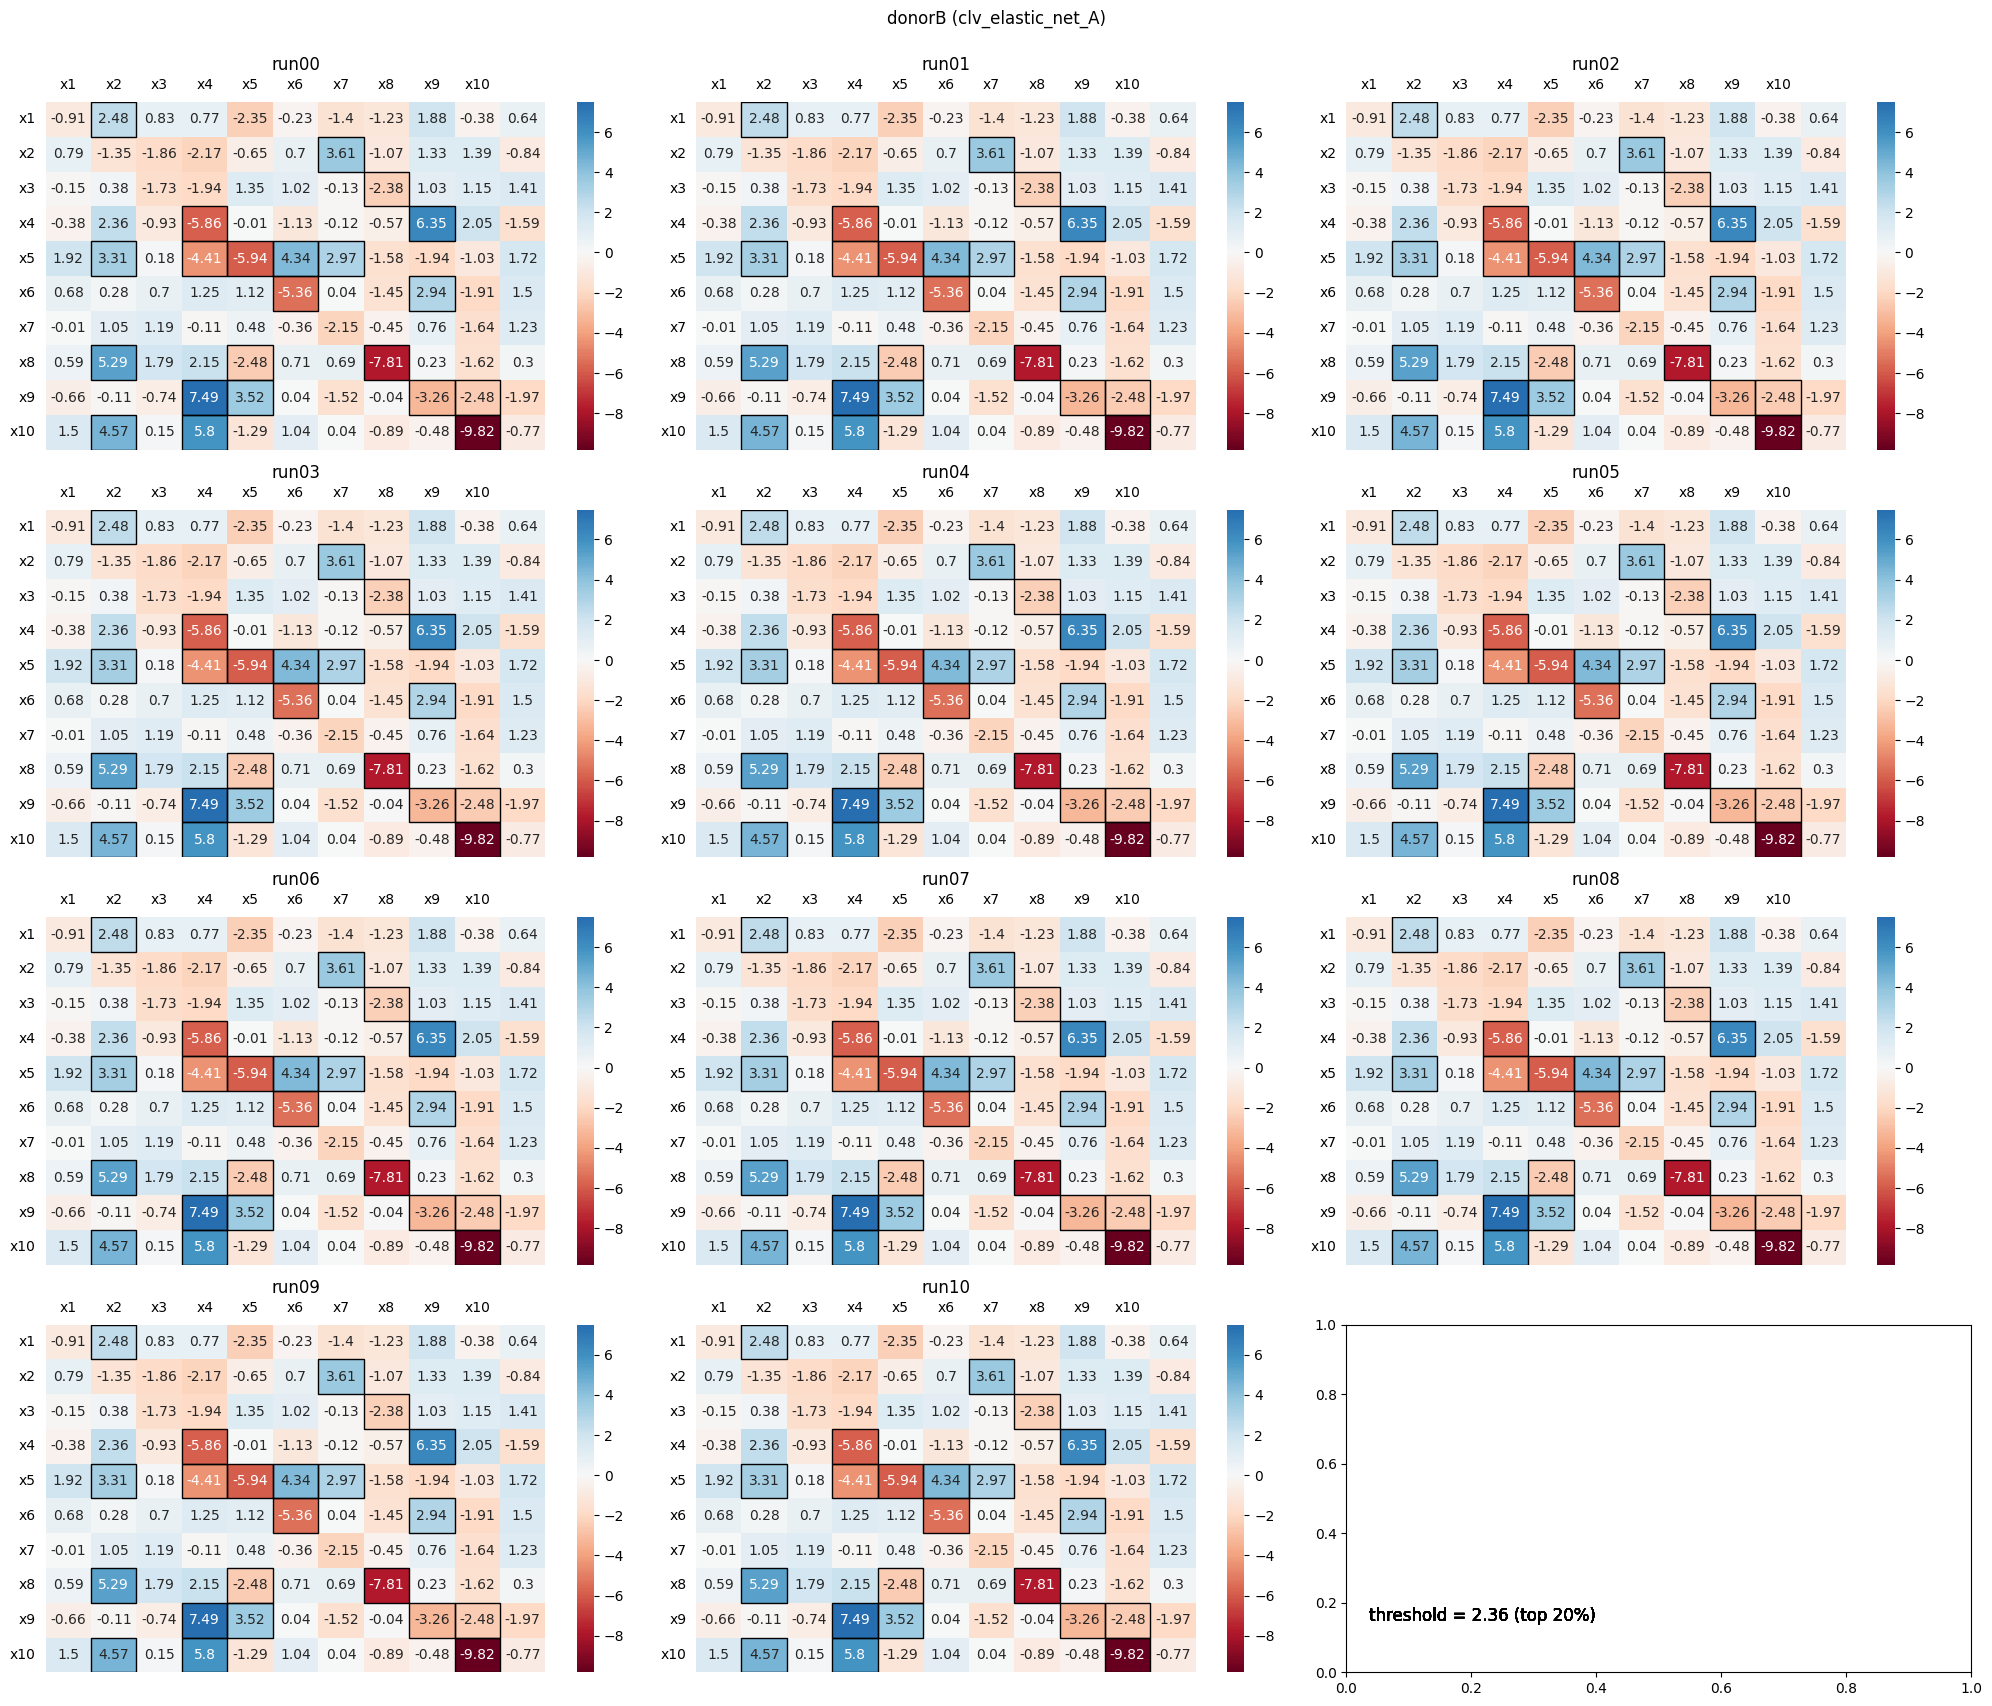

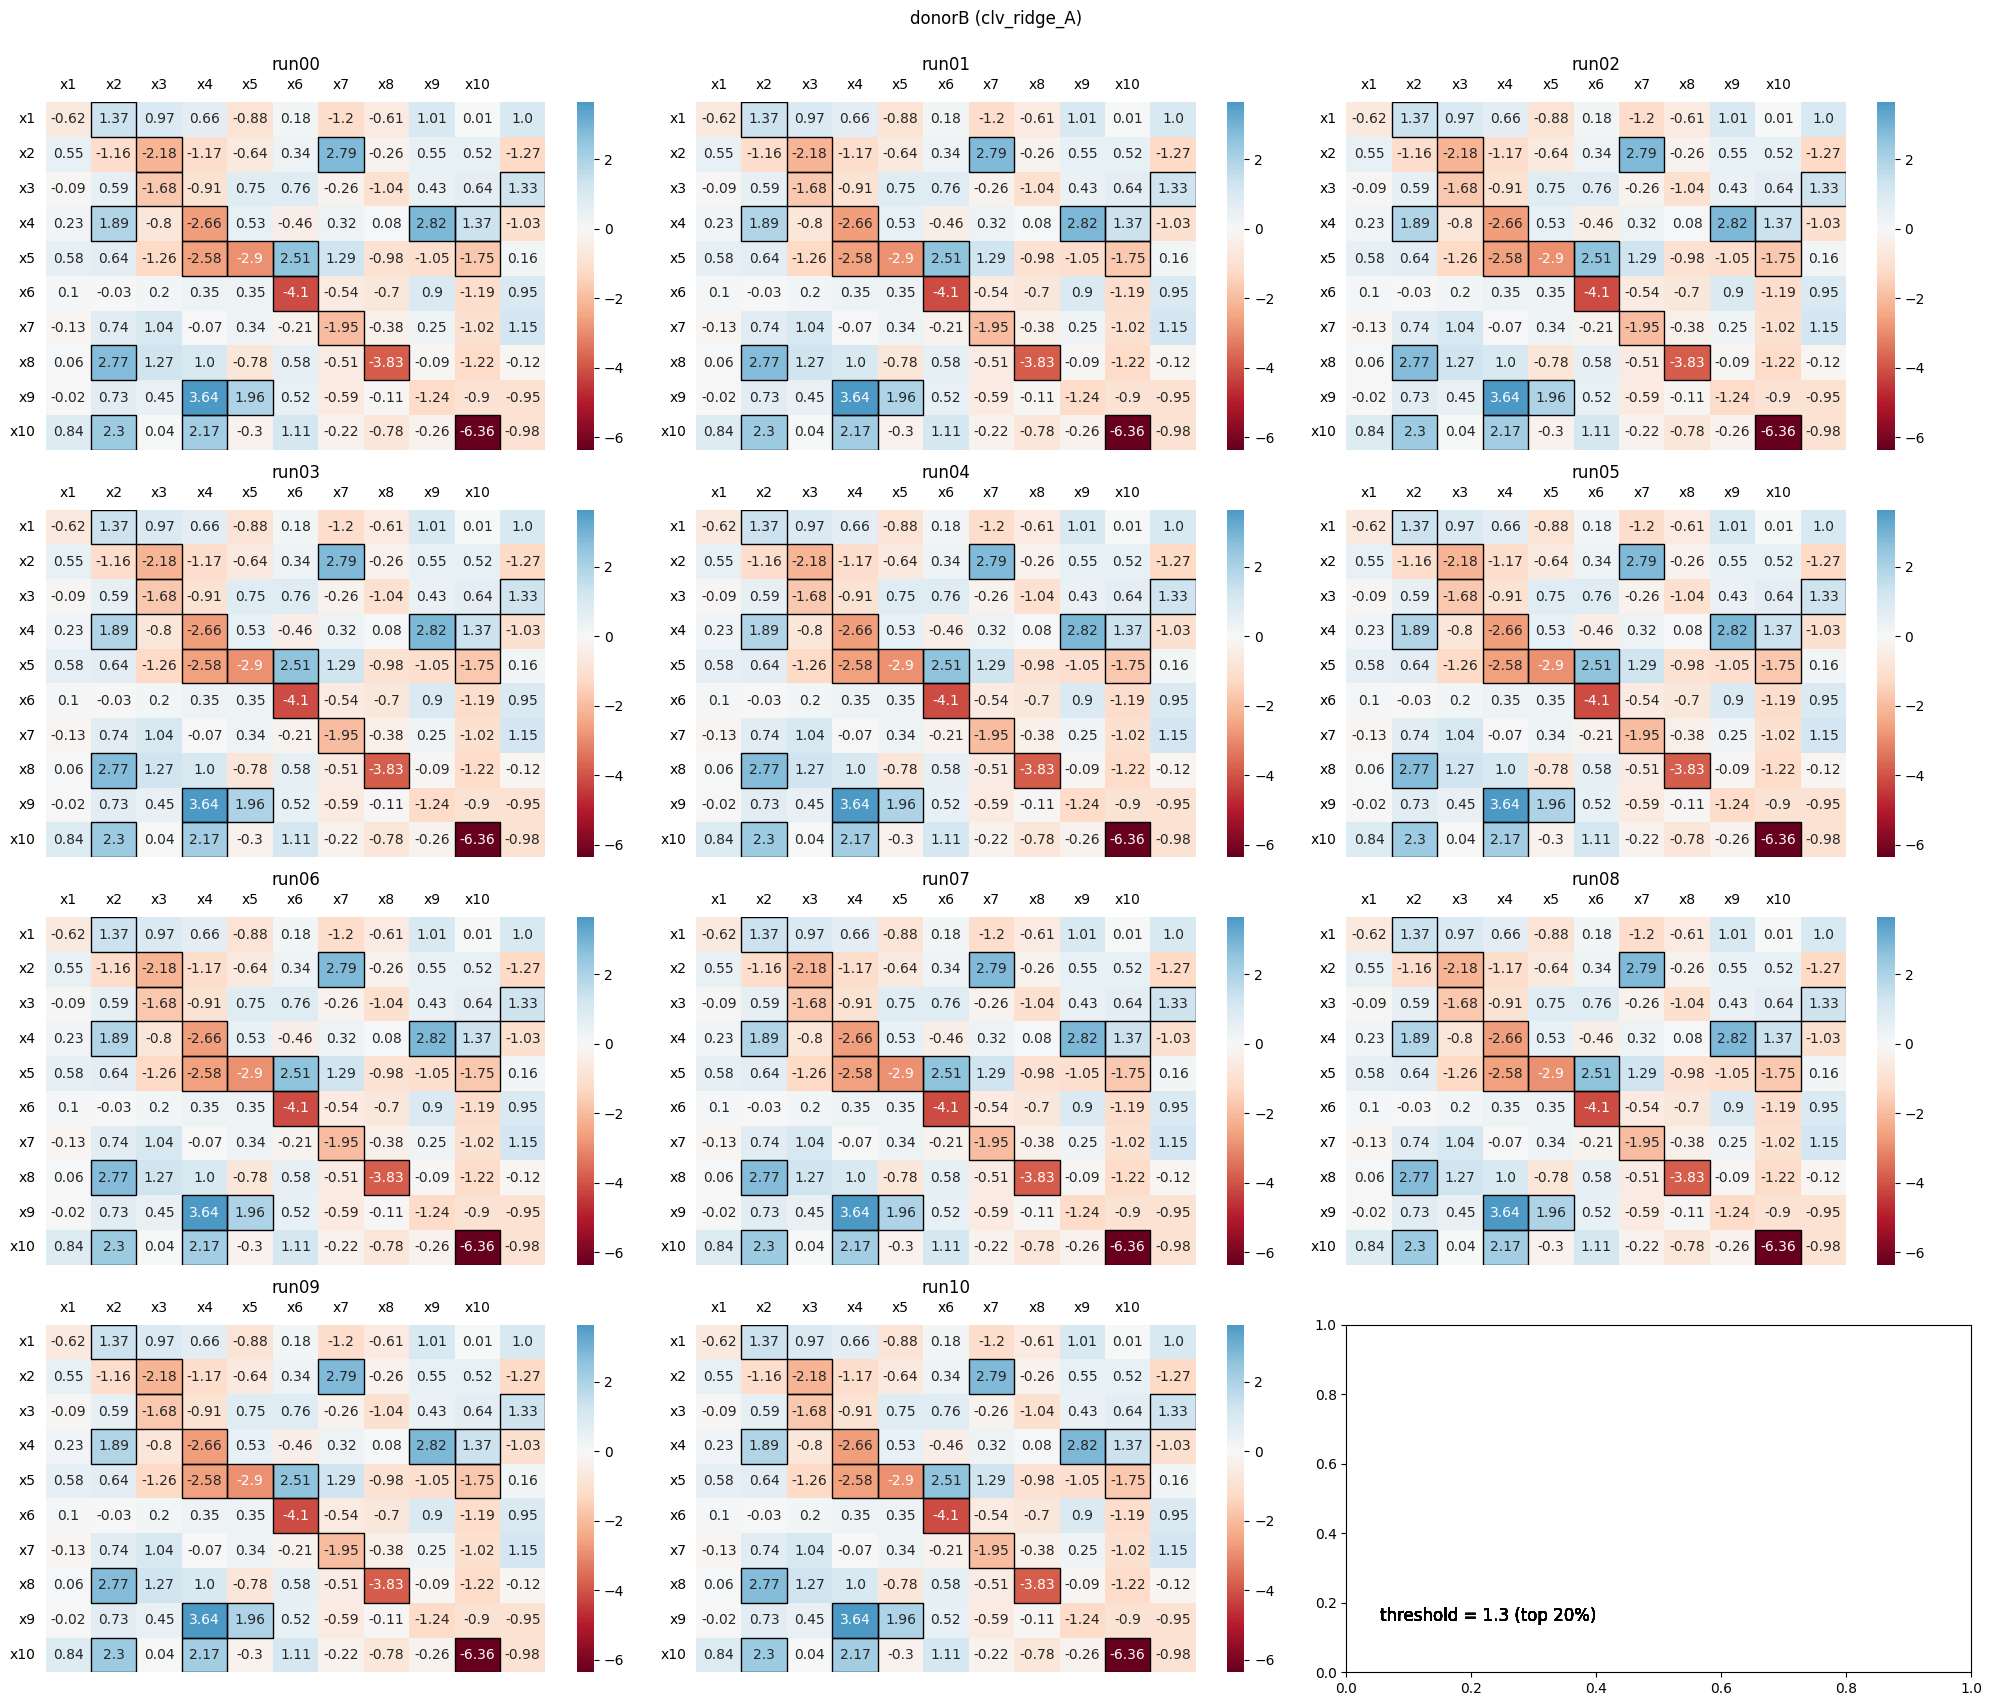

In [9]:
# for dataset in datasets:
dataset = datasets[1]
for Mat in ["clv_elastic_net_A", "clv_ridge_A"]: # "clv_elastic_net_A"
    # dataset = datasets[1]
    out_dir = output_dir_raw + "output_" + dataset + "/"

    # get list of available runs for the given dataset
    runs = []
    for file in [s for s in os.listdir(out_dir) if dataset in s]:
        m = re.search(r"run_(\d{2})", file)
        if m:
            runs.append(m.group(1))

    # specify dimensions of the plot
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:
        # specify dimensions of the plot
        n_row = 4
        n_col = 3

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        # fig.set_figwidth(4*n_col)
        # fig.set_figheight(2*n_row)
        fig.suptitle(f"{dataset} ({Mat})", y=1.0)

        y = 0

        for run in runs:
            out_run = out_dir + "output_" + dataset + f"_run_{run}"
            
            if os.path.exists(f"{out_run}/{Mat}.csv"):
                # read data files
                df_model_coeffs_tmp = pd.read_csv(f"{out_run}/{Mat}.csv", index_col=[0])
                n_taxa = df_model_coeffs_tmp.shape[0]

                plot_heatmap(round(df_model_coeffs_tmp,2), ax = axs[int(y/n_col), y%n_col], fig = fig,
                            title=f"run{run}", Mat=Mat)
                            
                fig.set_figwidth(2*n_taxa)
                fig.set_figheight(1.7*n_taxa)
                
                y += 1

        fig.tight_layout(pad=1.0)
            
        plt.yticks(rotation=0)
        # plt.savefig(f'{out_dir}/{Mat}_heatmap_all.pdf',
        #             bbox_inches='tight', dpi = 300)
        # plt.close()
        plt.show()

## Mean over all interaction matrices A

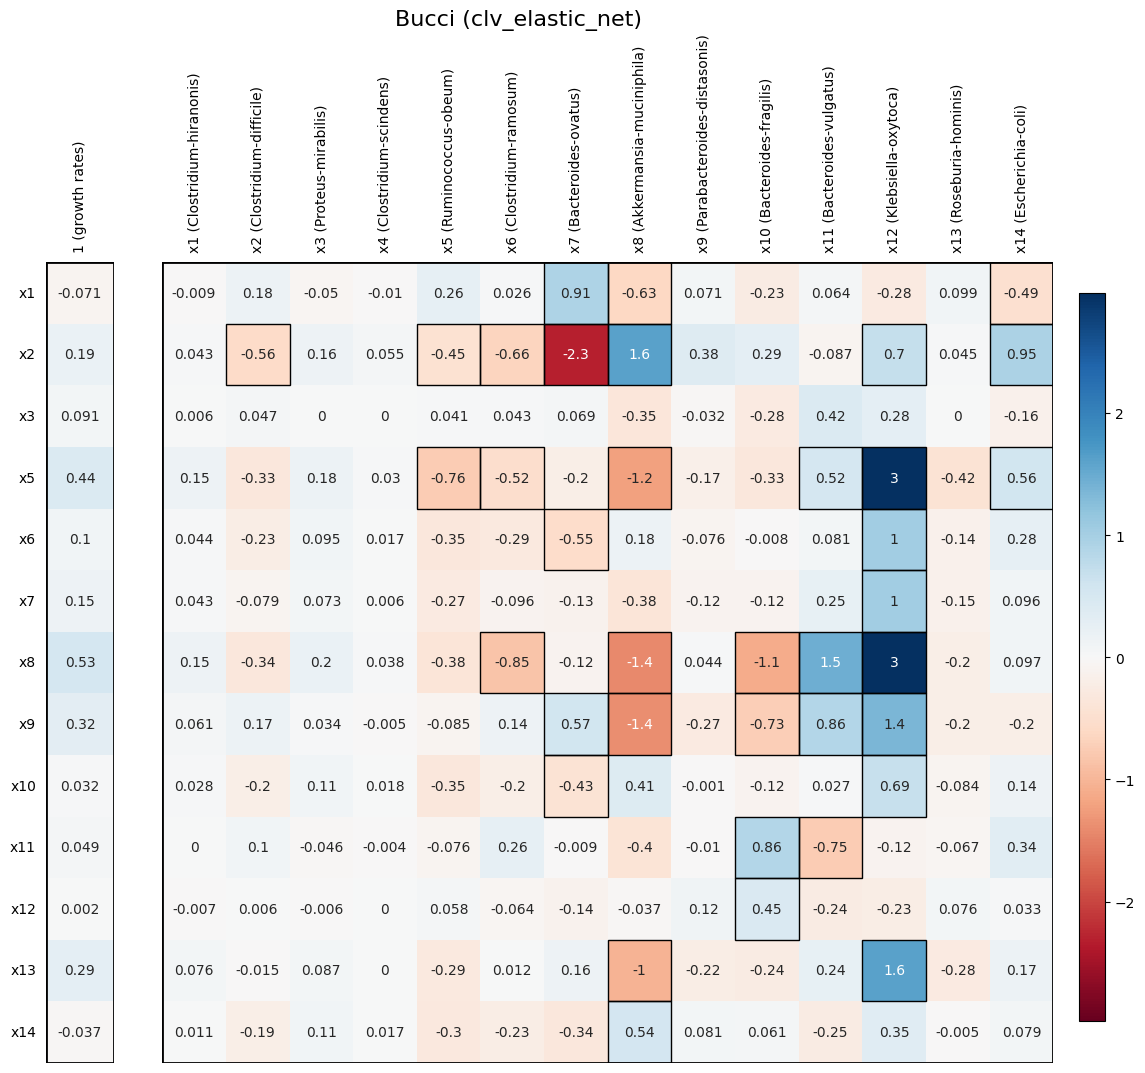

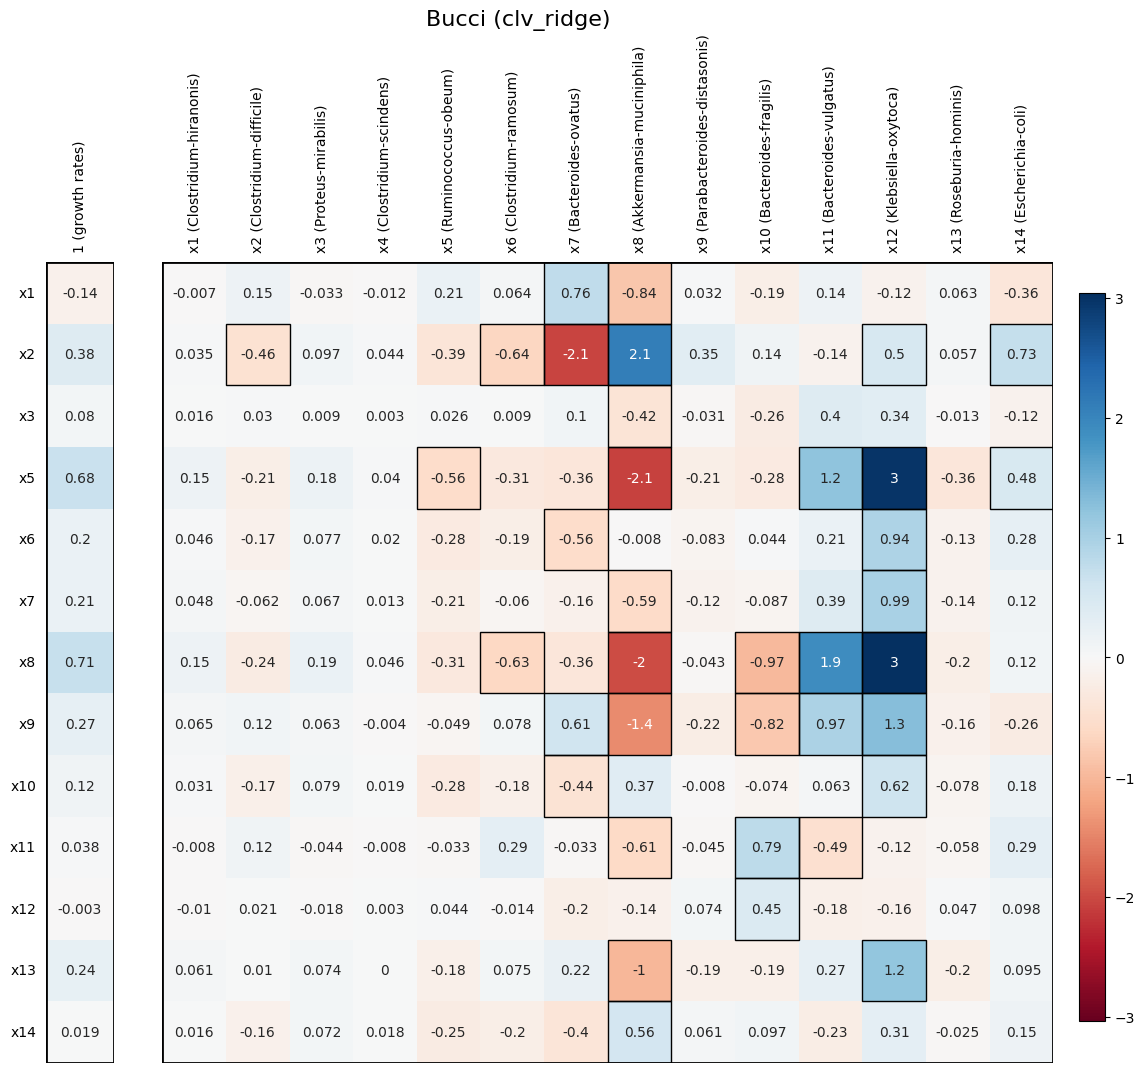

In [11]:
for dataset in datasets:
    for Mat in ["clv_elastic_net", "clv_ridge"]: # "clv_elastic_net_A", "clv_ridge_A", 
    # Mat = "clv_ridge_A"

        out_dir = output_dir_raw + "output_" + dataset

        # get number of taxa
        df = pd.read_csv(f'{out_dir}/output_{dataset}_run_05/clv_elastic_net_A.csv', index_col=0)
        n_taxa = len(df.index)

        # get list of available runs for the given dataset
        runs = []
        for file in [s for s in os.listdir(out_dir) if dataset in s]:
            m = re.search(r"run_(\d{2})", file)
            if m:
                runs.append(m.group(1))

        # number of available runs
        n_runs = len(runs)

        # check if runs for these specifications are available
        if n_runs > 0:
            
            model_coeffs_A_all = []
            model_coeffs_g_all = []

            for run in runs:
                out_run = out_dir + "/output_" + dataset + f"_run_{run}"
                if os.path.exists(f"{out_run}/{Mat}_A.csv"):
                    model_coeffs_A_tmp = pd.read_csv(f"{out_run}/{Mat}_A.csv", index_col=[0])
                    model_coeffs_A_all.append(model_coeffs_A_tmp.to_numpy())
                    model_coeffs_g_tmp = pd.read_csv(f"{out_run}/{Mat}_g.csv", index_col=[0])
                    model_coeffs_g_all.append(model_coeffs_g_tmp.to_numpy())
            names = pd.read_csv(f"{out_run}/ts_prediction_{dataset}.csv", header=0).columns[1:]

        if len(model_coeffs_A_all) > 0:
            # calculate mean over all coeff matrices
            mean_array_A = np.mean(model_coeffs_A_all, axis=0)
            mean_array_g = np.mean(model_coeffs_g_all, axis=0)
            # and save as csv file
            pd.DataFrame(mean_array_A).to_csv(f'{out_dir}/{Mat}_A_mean.csv', index=False)
            pd.DataFrame(mean_array_g).to_csv(f'{out_dir}/{Mat}_g_mean.csv', index=False)

            # make plot
            # plot_heatmap(matrix_A = np.around(mean_array_A, 2), ax = ax, fig=fig, 
            #             title = f"{dataset}, {Mat}", Mat=Mat, rec_per = 20)
            plot_heatmaps(mean_array_A, mean_array_g, n_taxa, title=f"{dataset} ({Mat})", colnames = names)
            
            # save plot
            plt.savefig(f'{out_dir}/{dataset}_{Mat}_heatmaps_A_g_mean.pdf',
                        bbox_inches='tight', dpi = 300)
            # plt.close()
            # plt.show()

# Prediction plots

## Summarize all fits in one plot

### rowwise

In [ ]:
for dataset in datasets:
    # dataset = "female"
    out_dir = output_dir_raw + "output_" + dataset

    # get number of taxa
    df = pd.read_csv(f'{out_dir}/output_{dataset}_run_05/clv_elastic_net_A.csv')
    n_taxa = len(df.index)

    # get list of available runs for the given dataset
    runs = []
    for file in [s for s in os.listdir(out_dir) if dataset in s and "." not in s]:
        m = re.search(r"run_(\d{2})", file)
        if m:
            runs.append(m.group(1))

    # specify dimensions of the plot
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:

        # specify dimensions of the plot
        n_row = max(n_runs, 2)
        n_col = n_taxa+1

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(4*n_col)
        fig.set_figheight(2*n_row)
        fig.suptitle(dataset, y=1.0)
        fig.tight_layout(pad = 2)

        y = 0

        for run in runs:
            out_run = out_dir + "/output_" + dataset + f"_run_{run}"
            
            if os.path.exists(f"{out_run}/ts_prediction_{dataset}.csv"):
                # read data files
                df_pred = pd.read_csv(f"{out_run}/ts_prediction_{dataset}.csv", header=[0])
                df_data_obs = pd.read_csv(f"{out_run}/ts_clv_input_data_{dataset}.csv", header=[0])

                # convert files to numpy array
                data_obs = np.array(df_data_obs)
                pred = np.array(df_pred)

                for taxon in np.arange(n_taxa+1):
                    # make plot
                    plot_pred(T_pred=data_obs[:,0], data_pred=pred[:,(taxon+1)], T_org=data_obs[:,0], data_org=data_obs[:,(taxon+1)],
                            ax = axs[int(y/n_col), (taxon)], title = df_data_obs.columns[(taxon+1)])                
                    y += 1

                # print name of the run on beginning of line
                axs[int((y-n_taxa)/n_col), 0].annotate(f"run {run}", xy=(0, 0.5), 
                                                    xytext=(-axs[int((y-n_taxa)/n_col), 0].yaxis.labelpad - 5, 0),
                                                    xycoords=axs[int((y-n_taxa)/n_col), 0].yaxis.label, textcoords='offset points',
                                                    size='large', ha='right', va='center')
        # # save plots in one file
        plt.savefig(f'{out_dir}/summary_predictions.pdf',
                    bbox_inches='tight', dpi = 300)
        plt.close()
        # plt.show()

### columnwise

In [ ]:
for dataset in datasets:
    # dataset = "female"
    out_dir = output_dir_raw + "output_" + dataset

    # get number of taxa
    df = pd.read_csv(f'{out_dir}/output_{dataset}_run_05/clv_elastic_net_A.csv')
    n_taxa = len(df.index)

    # get list of available runs for the given dataset
    runs = []
    for file in [s for s in os.listdir(out_dir) if dataset[0] in s]:
        m = re.search(r"run_(\d{2})", file)
        if m:
            runs.append(m.group(1))

    # specify dimensions of the plot
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:

        # specify dimensions of the plot
        n_row = n_taxa+1 # +1 for refernece in ALR
        n_col = max(n_runs, 2)

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(4*n_col)
        fig.set_figheight(2*n_row)
        fig.suptitle(dataset, y=1.0)
        fig.tight_layout(pad = 2, h_pad=2)

        for run_idx, run in enumerate(runs):
            out_run = out_dir + "/output_" + dataset + f"_run_{run}"
            
            if os.path.exists(f"{out_run}/ts_prediction_{dataset}.csv"):
                # read data files
                df_pred = pd.read_csv(f"{out_run}/ts_prediction_{dataset}.csv", header=[0])
                df_data_obs = pd.read_csv(f"{out_run}/ts_clv_input_data_{dataset}.csv", header=[0])

                # convert files to numpy array
                data_obs = np.array(df_data_obs)
                pred = np.array(df_pred)

                for taxon in np.arange(n_taxa+1):
                    # make plot
                    plot_pred(T_pred=data_obs[:,0], data_pred=pred[:,(taxon+1)], T_org=data_obs[:,0], data_org=data_obs[:,(taxon+1)],
                            ax = axs[taxon, run_idx], title = df_data_obs.columns[(taxon+1)], legend = False)
                    # axs[(taxon), int(y/n_row)].plot(data_obs[:,0], pred[:,(taxon)], label = "fit")
                    # axs[(taxon), int(y/n_row)].plot(data_obs[:,0], data_obs[:,(taxon+1)], label = "data", linewidth = 0.7, linestyle = '--', color = colors[1])
                    # axs[(taxon), int(y/n_row)].legend()
                    # axs[(taxon), int(y/n_row)].set_title(df_data_obs.columns[(taxon+1)])
                    axs[taxon, run_idx].set_xlabel("")
                    
                # axs[0,0].set_title(f"run {run}")
                # # print name of the run on beginning of line
                # axs[0, int((y-n_taxa)/n_col)].annotate(f"run {run}", xy=(0.5, 0), 
                #                                     xytext=(-axs[0, int((y-n_taxa)/n_col)].xaxis.labelpad, 0),
                #                                     xycoords=axs[0, int((y-n_taxa)/n_col)].xaxis.label, textcoords='offset points',
                #                                     size='large', ha='right', va='center')
                
                axs[taxon, run_idx].set_xlabel("Time")
                # Set the title for the run on top of the first plot in the column
                fig.text(axs[0, run_idx].get_position().x0 + axs[0, run_idx].get_position().width / 2, 1, 
                        f"Run {run}", ha='center', va='bottom', transform=fig.transFigure)
        
        # add overall legend below the plots
        handles, labels = [], []
        for ax in axs.ravel():
            for h, l in zip(*ax.get_legend_handles_labels()):
                if l not in labels:
                    handles.append(h)
                    labels.append(l)
        fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol = 2)

        # save plots in one file
        plt.savefig(f'{out_dir}/summary_predictions_columnwise.pdf',
                    bbox_inches='tight', dpi = 300)
        plt.close()
        plt.show()

## Predictions for all trajectories of one run

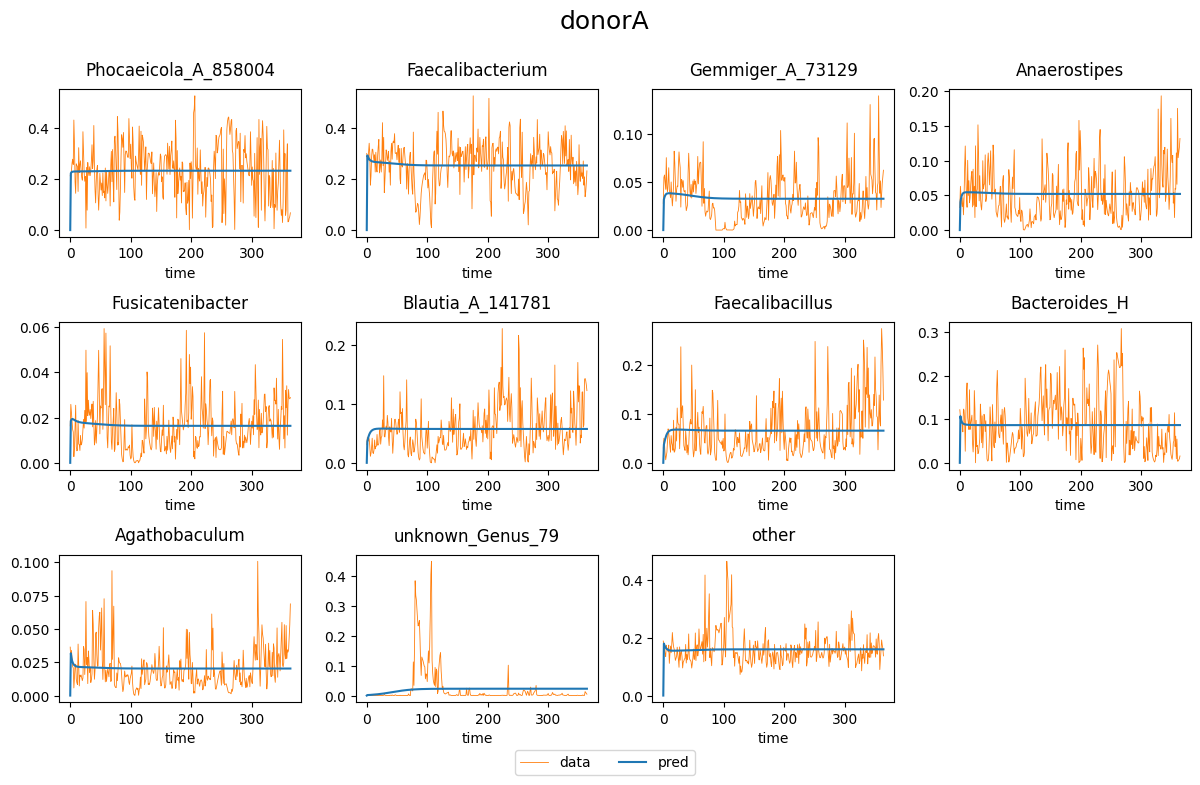

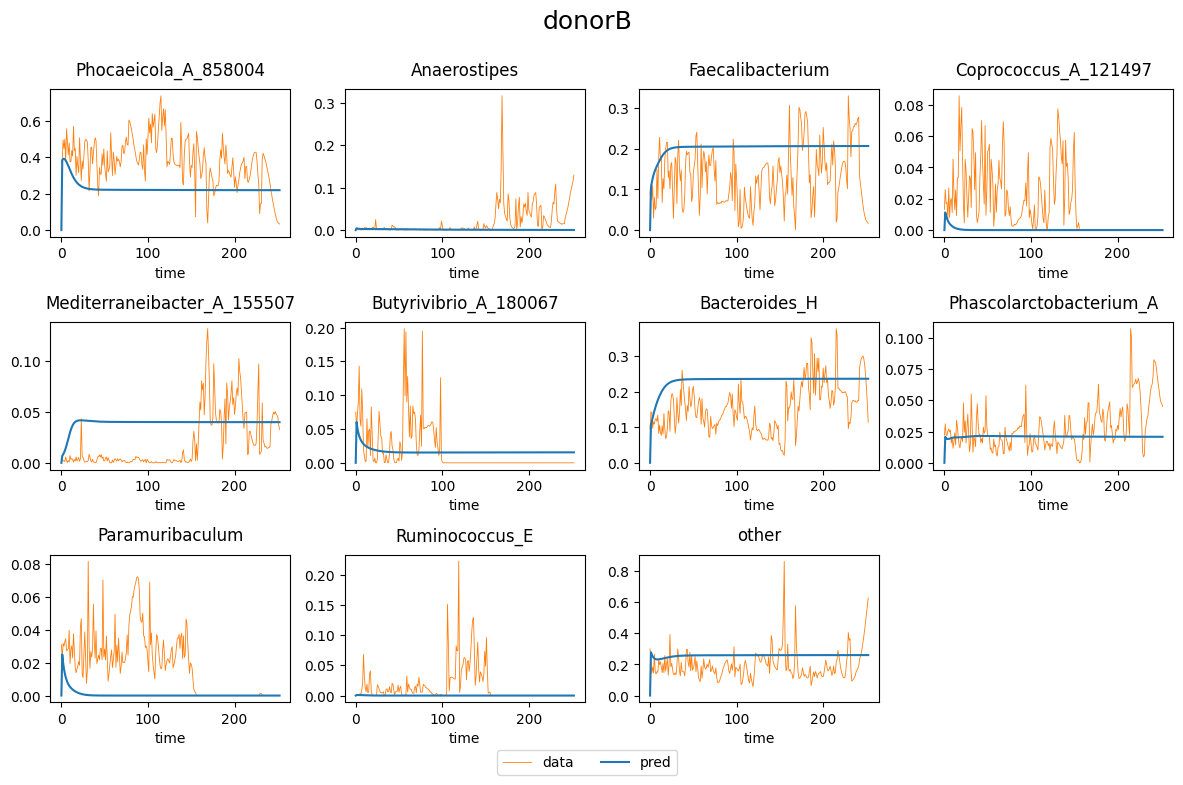

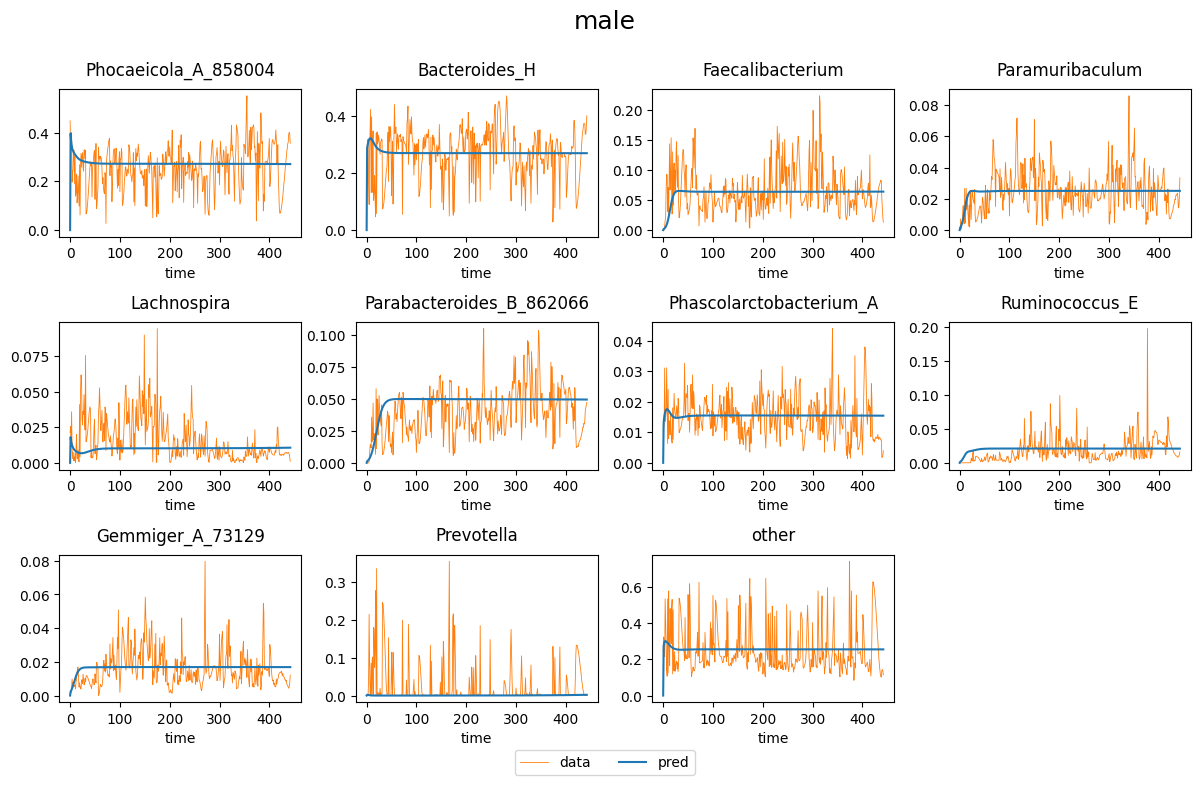

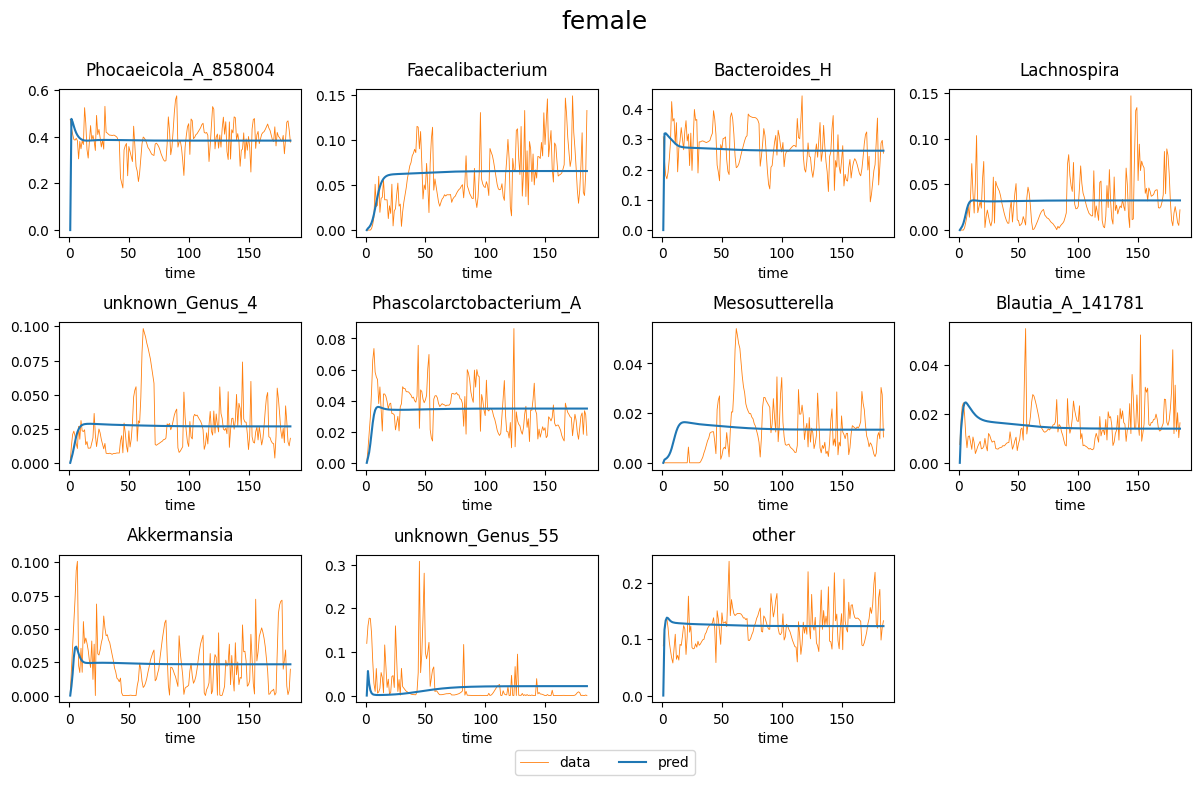

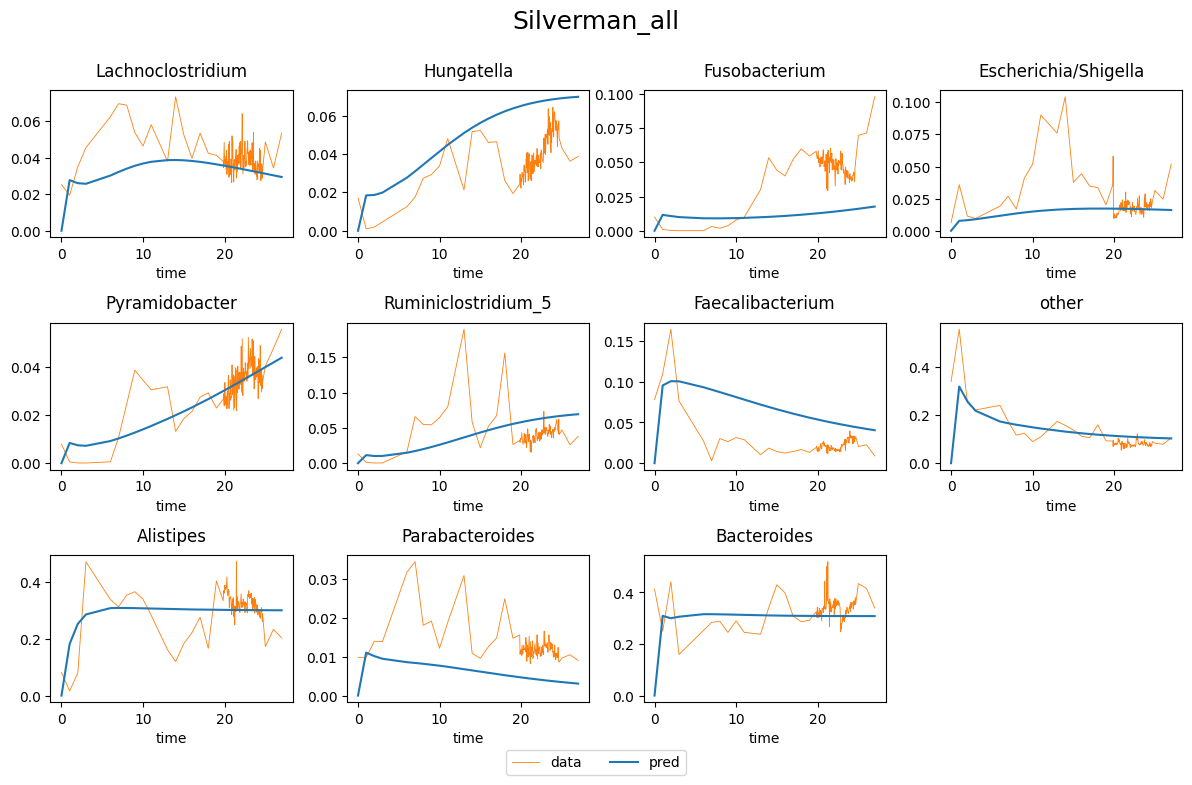

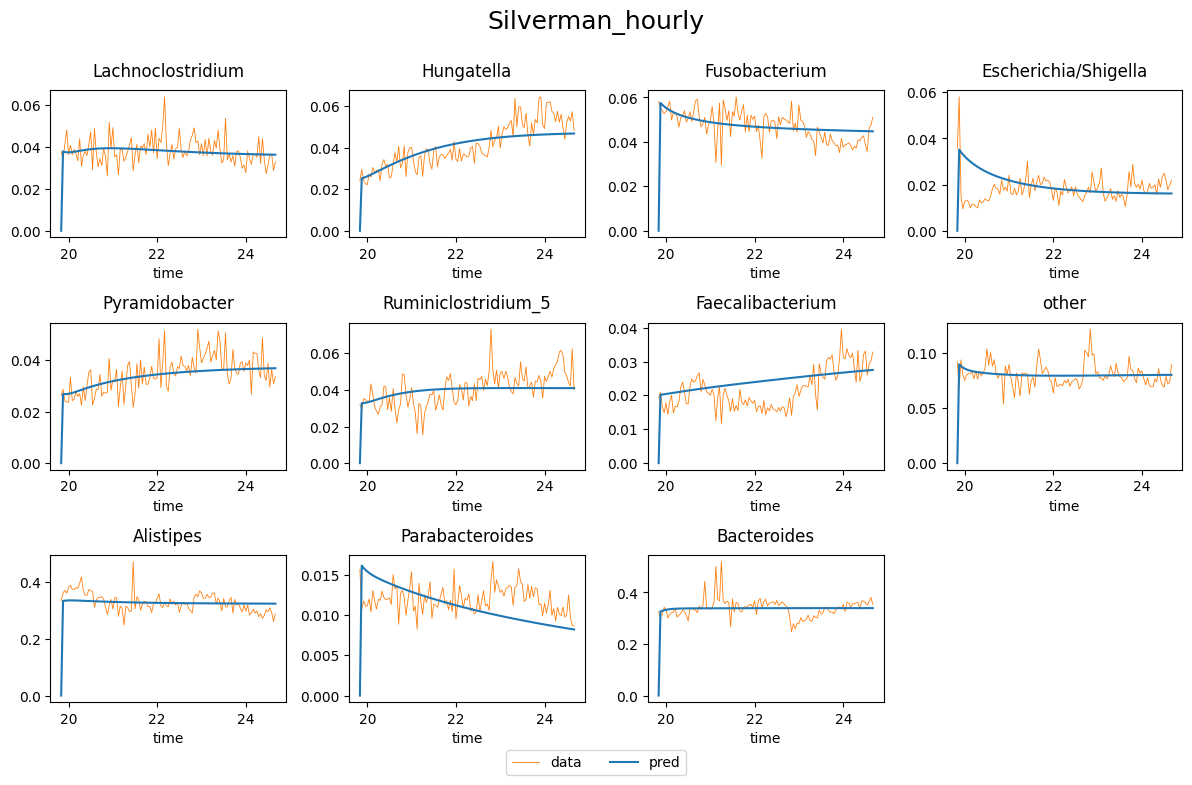

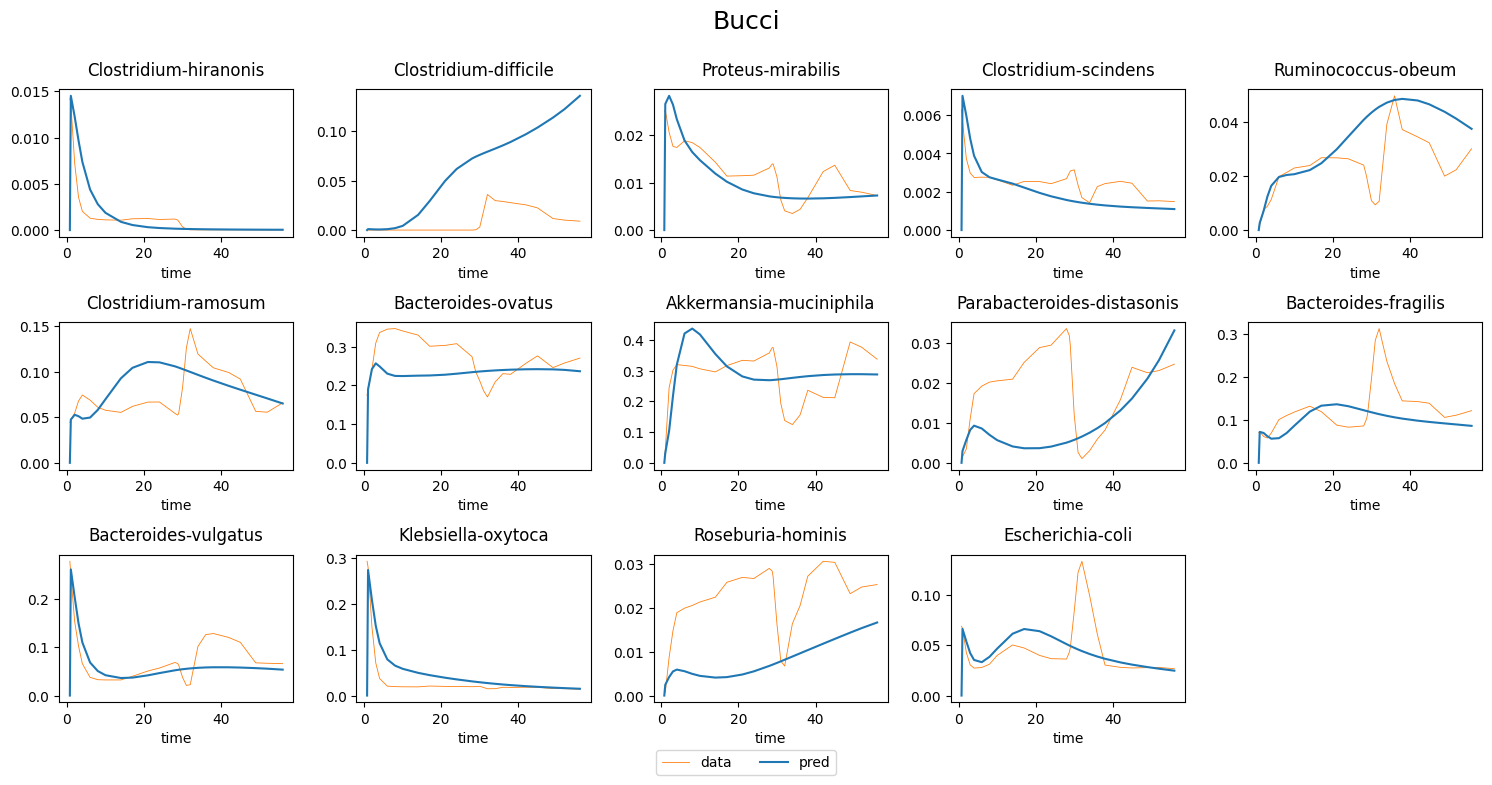

In [11]:
Mat = "elastic_net"
for dataset in datasets:
    # dataset = "Bucci"
    out_dir = output_dir_raw + "output_" + dataset

    # get number of taxa
    df = pd.read_csv(f'{out_dir}/output_{dataset}_run_10/clv_{Mat}_A.csv')
    n_taxa = len(df.index)

    run = 10

    # specify dimensions of the plot
    n_col = math.ceil((n_taxa+1)/3)
    n_row = 3

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(3*n_col)
    fig.set_figheight(2.5*n_row)
    fig.suptitle(dataset, y=1.0, fontsize = 18)

    y = 0
    out_run = out_dir + "/output_" + dataset + f"_run_{run}"

    if os.path.exists(f"{out_run}/ts_clv_{Mat}_prediction_{dataset}.csv"):
        # read data files
        df_pred = pd.read_csv(f"{out_run}/ts_clv_{Mat}_prediction_{dataset}.csv", header=[0])
        df_data_obs = pd.read_csv(f"{out_run}/ts_clv_input_data_{dataset}.csv", header=[0])

        # convert files to numpy array
        data_obs = np.array(df_data_obs)
        pred = np.array(df_pred)

        for taxon in np.arange(n_taxa+1):
            # make plot
            plot_pred(T_pred=data_obs[:,0], data_pred=pred[:,(taxon+1)], T_org=data_obs[:,0], data_org=data_obs[:,(taxon+1)],
                    ax = axs[int(y/n_col), y%n_col], title = df_data_obs.columns[(taxon+1)], legend=False)                
            y += 1
            
    # add overall legend below the plots
    handles, labels = [], []
    for ax in axs.ravel():
        for h, l in zip(*ax.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol = 2)

    # remove last (empty) plots from grid
    if (y+1)%n_col == 0:
        fig.delaxes(axs[int(y/n_col), y%n_col])

    fig.tight_layout(pad = 1)

    # save plots in one file
    plt.savefig(f'{out_dir}/{dataset}_clv_{Mat}_predictions_3rows.pdf',
                bbox_inches='tight', dpi = 300)
    # plt.close()